# Aprendizaje Supervisado
# UdeSA, 2023
## Profesores: Marcela Svarc, Juan Manuel Pérez


## TP: Clasificación de tópicos de noticias



Vamos a comenzar viendo de armar un modelo de bolsa de palabras. Para ello, utilizaremos `CountVectorizer` de `sklearn`


In [1]:
%pip install numpy



[notice] A new release of pip is available: 23.0.1 -> 23.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
from sklearn.feature_extraction.text import CountVectorizer

CountVectorizer?

Init signature:
CountVectorizer(
    *,
    input='content',
    encoding='utf-8',
    decode_error='strict',
    strip_accents=None,
    lowercase=True,
    preprocessor=None,
    tokenizer=None,
    stop_words=None,
    token_pattern='(?u)\\b\\w\\w+\\b',
    ngram_range=(1, 1),
    analyzer='word',
    max_df=1.0,
    min_df=1,
    max_features=None,
    vocabulary=None,
    binary=False,
    dtype=<class 'numpy.int64'>,
)
Docstring:     
Convert a collection of text documents to a matrix of token counts.

This implementation produces a sparse representation of the counts using
scipy.sparse.csr_matrix.

If you do not provide an a-priori dictionary and you do not use an analyzer
that does some kind of feature selection then the number of features will
be equal to the vocabulary size found by analyzing the data.

For an efficiency comparision of the different feature extractors, see
:ref:`sphx_glr_auto_examples_text_plot_hashing_vs_dict_vectorizer.py`.

Read more in the :ref:`User Guid

In [3]:
from sklearn.feature_extraction.text import CountVectorizer

textos = [
    "bolsa de palabras",
    "palabras de bolsa",
    "bolsa es una palabra",
    "palabra es una bolsa",
    "palabra no es una bolsa",
    "bolsa es una bolsa",
    "bolsa es una bolsa y es una palabra",
    "bolsa bolsa bolsa palabra es es una una y",
]

vect = CountVectorizer()
# Si quisieramos que considere en el diccionario secuencia de un caracter (como la palabra "y", hay que modificar el parámetro token_pattern al instanciar CountVectorizer
# vect = CountVectorizer(token_pattern=r'(?u)\b\w+\b')
vect.fit(textos)

CountVectorizer()

En `vect.vocabulary_` podemos encontrar el vocabulario construido por `CountVectorizer`

In [4]:
#Acá vemos el diccionario con las palabras y el índice que le asigna a cada una
vect.vocabulary_

{'bolsa': 0, 'de': 1, 'palabras': 5, 'es': 2, 'una': 6, 'palabra': 4, 'no': 3}

`vect.transform` convierte un conjunto de textos en su representación matricial

In [5]:
vect.transform(textos).todense()

matrix([[1, 1, 0, 0, 0, 1, 0],
        [1, 1, 0, 0, 0, 1, 0],
        [1, 0, 1, 0, 1, 0, 1],
        [1, 0, 1, 0, 1, 0, 1],
        [1, 0, 1, 1, 1, 0, 1],
        [2, 0, 1, 0, 0, 0, 1],
        [2, 0, 2, 0, 1, 0, 2],
        [3, 0, 2, 0, 1, 0, 2]])

Armemos un dataframe para que nos muestre qué significa cada columna de la matriz

In [6]:
import pandas as pd

# Doy vuelta y ordeno el vocabulario (perdón por lo horrendo)
vocab = {v:k for k, v in vect.vocabulary_.items()}
columns = [vocab[k] for k in range(len(vocab))]

df = pd.DataFrame(
    vect.transform(textos).todense(),
    columns=columns
)

df["text"] = textos

df

,bolsa,de,es,no,palabra,palabras,una,text
0,1,1,0,0,0,1,0,bolsa de palabras
1,1,1,0,0,0,1,0,palabras de bolsa
2,1,0,1,0,1,0,1,bolsa es una palabra
3,1,0,1,0,1,0,1,palabra es una bolsa
4,1,0,1,1,1,0,1,palabra no es una bolsa
5,2,0,1,0,0,0,1,bolsa es una bolsa
6,2,0,2,0,1,0,2,bolsa es una bolsa y es una palabra
7,3,0,2,0,1,0,2,bolsa bolsa bolsa palabra es es una una y


Este modelo se llama de "unigramas" porque sólo considera apariciones de una única palabra. ¿Podemos extender esto?

## n-gramas

Una forma de agregar cierto orden  es mediante el uso de n-gramas.

In [7]:

vect = CountVectorizer(ngram_range=(1, 2))

vect.fit(textos)

# Doy vuelta y ordeno el vocabulario (perdón por lo horrendo)
vocab = {v:k for k, v in vect.vocabulary_.items()}
columns = [vocab[k] for k in range(len(vocab))]

df = pd.DataFrame(
    vect.transform(textos).todense(),
    columns=columns
)

df["text"] = textos


pd.options.display.max_columns = 50

df

,bolsa,bolsa bolsa,bolsa de,bolsa es,bolsa palabra,de,de bolsa,de palabras,es,es es,es una,no,no es,palabra,palabra es,palabra no,palabras,palabras de,una,una bolsa,una palabra,una una,text
0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,bolsa de palabras
1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,palabras de bolsa
2,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,bolsa es una palabra
3,1,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,1,1,0,0,palabra es una bolsa
4,1,0,0,0,0,0,0,0,1,0,1,1,1,1,0,1,0,0,1,1,0,0,palabra no es una bolsa
5,2,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,bolsa es una bolsa
6,2,0,0,2,0,0,0,0,2,0,2,0,0,1,0,0,0,0,2,1,1,0,bolsa es una bolsa y es una palabra
7,3,2,0,0,1,0,0,0,2,1,1,0,0,1,1,0,0,0,2,0,0,1,bolsa bolsa bolsa palabra es es una una y


## Conjunto de datos



Vamos a utilizar el conjunto de datos [AG News](https://huggingface.co/datasets/ag_news). Cada instancia del conjunto de datos consiste en un título y un cuerpo de una noticia, y una etiqueta que indica la categoría a la que pertenece. Las categorías son: 'World', 'Sports', 'Business' y 'Sci/Tech'.

| Texto                                                                                           | Categoría |
| ----------------------------------------------------------------------------------------------- | --------- |
| Wall St. Bears Claw Back Into the Black (Reuters) Reuters -.                                    | Business  |
| VIEW: Arafats ghost Barry Rubin Rarely in history has a political movement ...                  | World     |
| Tough loss for Pavano, Marlins ATLANTA -- All-Star pitcher Carl Pavano ...                      | Sports    |
| Digital ways to have fun including an HP-branded version of Apple's iPod - designed with an ... | Sci/Tech  |


In [8]:
from datasets import load_dataset

# Con esto lo bajamos de este repositorio centralizado
ds = load_dataset("ag_news")

In [9]:
vect = CountVectorizer()
# Si quisieramos que considere en el diccionario secuencia de un caracter (como la palabra "y", hay que modificar el parámetro token_pattern al instanciar CountVectorizer
# vect = CountVectorizer(token_pattern=r'(?u)\b\w+\b')
vect.fit(ds["train"]["text"])

CountVectorizer()

In [10]:
vect.vocabulary_

{'wall': 62536,
 'st': 54842,
 'bears': 7396,
 'claw': 12600,
 'back': 6510,
 'into': 30178,
 'the': 57946,
 'black': 8345,
 'reuters': 48864,
 'short': 52479,
 'sellers': 51606,
 'street': 55636,
 'dwindling': 18921,
 'band': 6832,
 'of': 40992,
 'ultra': 60125,
 'cynics': 15556,
 'are': 5306,
 'seeing': 51513,
 'green': 25524,
 'again': 3522,
 'carlyle': 11003,
 'looks': 34641,
 'toward': 58949,
 'commercial': 13334,
 'aerospace': 3403,
 'private': 45497,
 'investment': 30295,
 'firm': 22407,
 'group': 25738,
 'which': 63232,
 'has': 26655,
 'reputation': 48499,
 'for': 22995,
 'making': 35425,
 'well': 63065,
 'timed': 58419,
 'and': 4589,
 'occasionally': 40897,
 'controversial': 14176,
 'plays': 44291,
 'in': 29098,
 'defense': 16298,
 'industry': 29401,
 'quietly': 46559,
 'placed': 44156,
 'its': 30678,
 'bets': 7935,
 'on': 41274,
 'another': 4839,
 'part': 42792,
 'market': 35869,
 'oil': 41112,
 'economy': 19185,
 'cloud': 12795,
 'stocks': 55419,
 'outlook': 41907,
 'soaring

In [11]:
matriz=vect.transform(ds["train"]["text"]).todense()

In [12]:
#import numpy as np
#np.max(matriz)

In [13]:
# Convertimos a pandas

id2label = ds["train"].features["label"].names

df_train = ds["train"].to_pandas()

df_test = ds["test"].to_pandas()

In [14]:
df_train

,text,label
0,Wall St. Bears Claw Back Into the Black (Reute...,2
1,Carlyle Looks Toward Commercial Aerospace (Reu...,2
2,Oil and Economy Cloud Stocks' Outlook (Reuters...,2
3,Iraq Halts Oil Exports from Main Southern Pipe...,2
4,"Oil prices soar to all-time record, posing new...",2
...,...,...
119995,Pakistan's Musharraf Says Won't Quit as Army C...,0
119996,Renteria signing a top-shelf deal Red Sox gene...,1
119997,Saban not going to Dolphins yet The Miami Dolp...,1
119998,Today's NFL games PITTSBURGH at NY GIANTS Time...,1


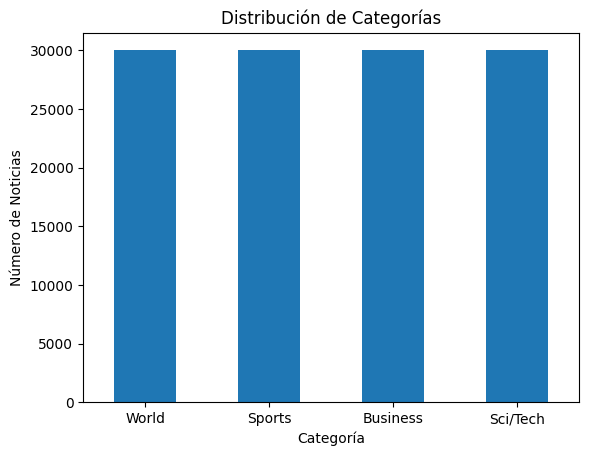

In [24]:
import matplotlib.pyplot as plt

# Cantidad de noticias por categoría
noticias_categoria = df_train['label'].value_counts()

# Grafico
noticias_categoria.plot(kind='bar')  
plt.title('Distribución de Categorías')
plt.xlabel('Categoría')
plt.ylabel('Número de Noticias')
plt.xticks([0,1,2,3], ['World', 'Sports', 'Business', 'Sci/Tech'], rotation=0)
plt.show()


Se ve en el gráfico de arriba que la distribución de las noticias por categoría en la muestra de entrenamiento es bastante equilibrada y todas están representadas en proporciones similares en la muestra de entrenamiento.

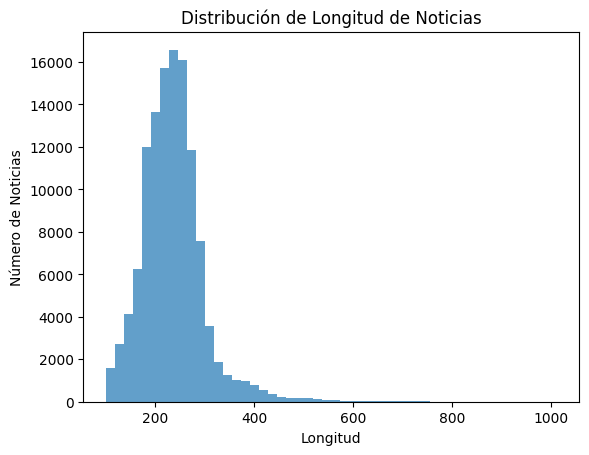

In [19]:
# Calcular la longitud de cada noticia
df_train['text_length'] = df_train['text'].apply(len)

# Visualizar la distribución de longitudes
plt.hist(df_train['text_length'], bins=50, alpha=0.7)
plt.title('Distribución de Longitud de Noticias')
plt.xlabel('Longitud')
plt.ylabel('Número de Noticias')
plt.show()


En el histograma se puede observar la frecuencia de noticias según su longitud. La mayoría de las noticias tienen una longitud que está en el rango de 200 a 400 palabras. La distibución es bastante simétrica, sugiriendo una distribución normal o gaussiana. Esto, podría estar dando un indicio de que no hay un sesgo hacia noticias muy cortas o muy largas.

In [22]:
# Leemos algunas noticias de cada cateogría para tener de referencia
categoria = ['World', 'Sports', 'Business', 'Sci/Tech']

for idx, categoria in enumerate(categoria):
    print(f"\nCategoría: {categoria}\n")
    sample_texts = df_train[df_train['label'] == idx]['text'].sample(3).tolist()
    for text in sample_texts:
        print(text)
        print("-"*50)



Categoría: World

Independent judges vital A series of prohibitions recently issued by the Higher People #39;s Court of the Beijing Municipality on judges #39; dealings with cases are expected to help maintain justice if strictly implemented, says an article in Beijing Youth Daily.
--------------------------------------------------
Sharon government faces crisis after double blow in Israeli &lt;b&gt;...&lt;/b&gt; JERUSALEM : Israeli Prime Minister Ariel Sharon faced a fresh political crisis after the secular Shinui party threatened to quit the ruling coalition and he suffered two symbolic defeats at the hands of parliament.
--------------------------------------------------
Stocks Slide As Oil Nears \$50 a Barrel NEW YORK - Oil prices reached a new high and sent stocks lower Monday, but with trading on Wall Street light and losses only moderate, investors seemed to be coming to terms with near-\$50 per barrel crude.    After setting a new all-time record settlement price of \$48.88 on

In [27]:
# Tomamos una proporción de la muestra de entrenamiento para que el entrenamiento sea más eficiente computacionalmente
# muestra_fraccion = 0.1
# df_train_muestra= df_train.sample(frac=muestra_fraccion, random_state=42)


# Hacemos el pre procesamiento con count_vectorizer()
vect = CountVectorizer()
X_train = vect.fit_transform(df_train['text'])
y_train = df_train['label']


In [ ]:
# Veo las primeras 5

In [16]:
id2label

['World', 'Sports', 'Business', 'Sci/Tech']

Tips:

- Usar `Pipeline` de `sklearn` para armar el pipeline de preprocesamiento y clasificación todo en uno. Mirar la documentación para ver cómo se usa.

- Pegarle un vistazo a Tf-Idf en la parte de "Feature Extraction" de `sklearn`.